PARCIAL ANALISIS AVANZADSO DE DATOS \
Marloon louis, Camilo Hoyos, Javier Useche

# **Comentarios**

## Análisis Exploratorio de Datos
Deben visualizar la relación entre las diferentes características y la variable objetivo ("Age"). Además, deben verificar la correlación entre las características y la variable objetivo.

**Comentarios**

Realizan un análisis inicial sólido, abordando múltiples aspectos clave del análisis exploratorio de datos.

en general es valido, solo es importante revisar la variable de sex

**Puntos o totales: 9/10**

## Construcción del Modelo:
Deben construir un modelo de regresión, que puede ser lineal múltiple o polinomial, para predecir la edad del cangrejo. Deben evaluar el modelo utilizando métricas como RMSE y MAE.

**Comentarios**

#### **Selección de Características**

La selección de las características se realiza utilizando el conjunto de datos completo y se evalúa mediante el modelo Lasso. Sin embargo, no se ofrece una explicación clara sobre la inclusión o exclusión de la categoría 'I' en la variable de sexo durante este proceso.

#### **Validación**

Utilizan un conjunto de validación y emplean R cuadrado como métrica de calidad. Según este coeficiente, el modelo es capaz de explicar solo el 56% de la variabilidad en la variable objetivo. Sin embargo, es destacable que los resultados son bastante consistentes entre los diferentes modelos evaluados.

**Puntos o totales: 19/25**


##Entrenamiento Final y Evaluación:


**Puntos o totales: 14/15**



# 1

In [ ]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('CrabAgePrediction_Subset1.csv')


# 1A

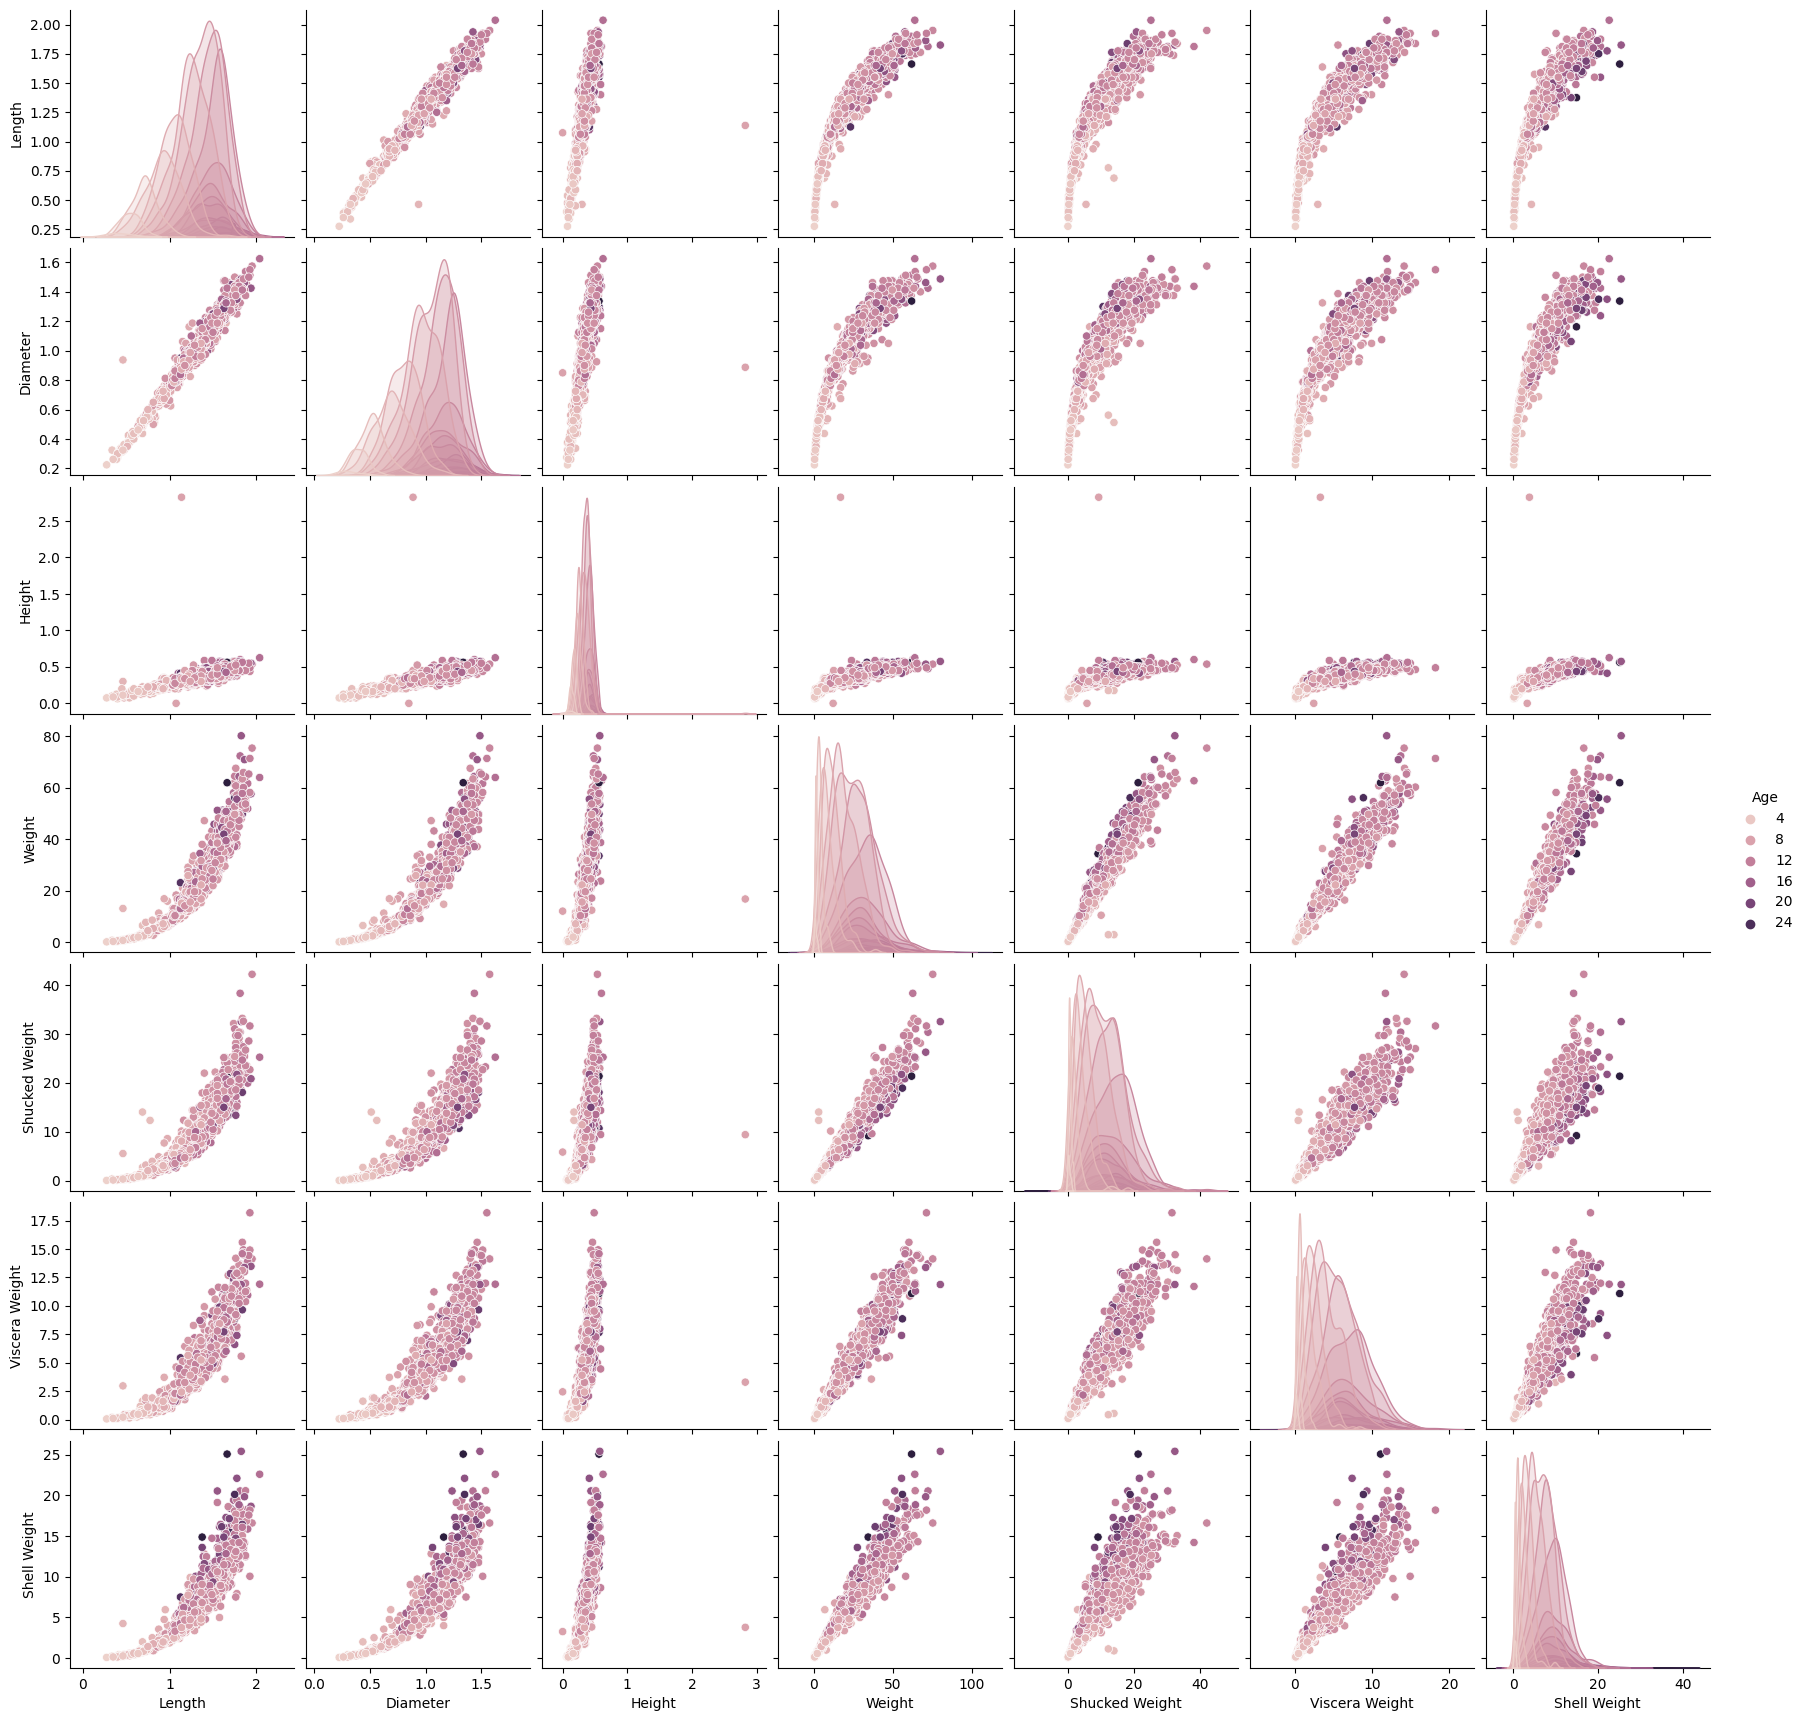

In [ ]:


sns.pairplot(df, hue="Age", diag_kind="kde")

# Mostrar los diagramas de dispersión
plt.show()

De estas gráficas, podemos destacar la aparente forma cuadrática que presentan las variables 'Length' y 'Diameter', la cual es evidente en todas las variables excepto 'Height' y en las relaciones entre ellas. También podemos apreciar que todas las variables muestran coeficientes positivos, lo que indica una correlación positiva entre ellas. Además, notamos que a medida que estas variables aumentan, se observa una tendencia hacia la presencia de cangrejos de edades más avanzadas.

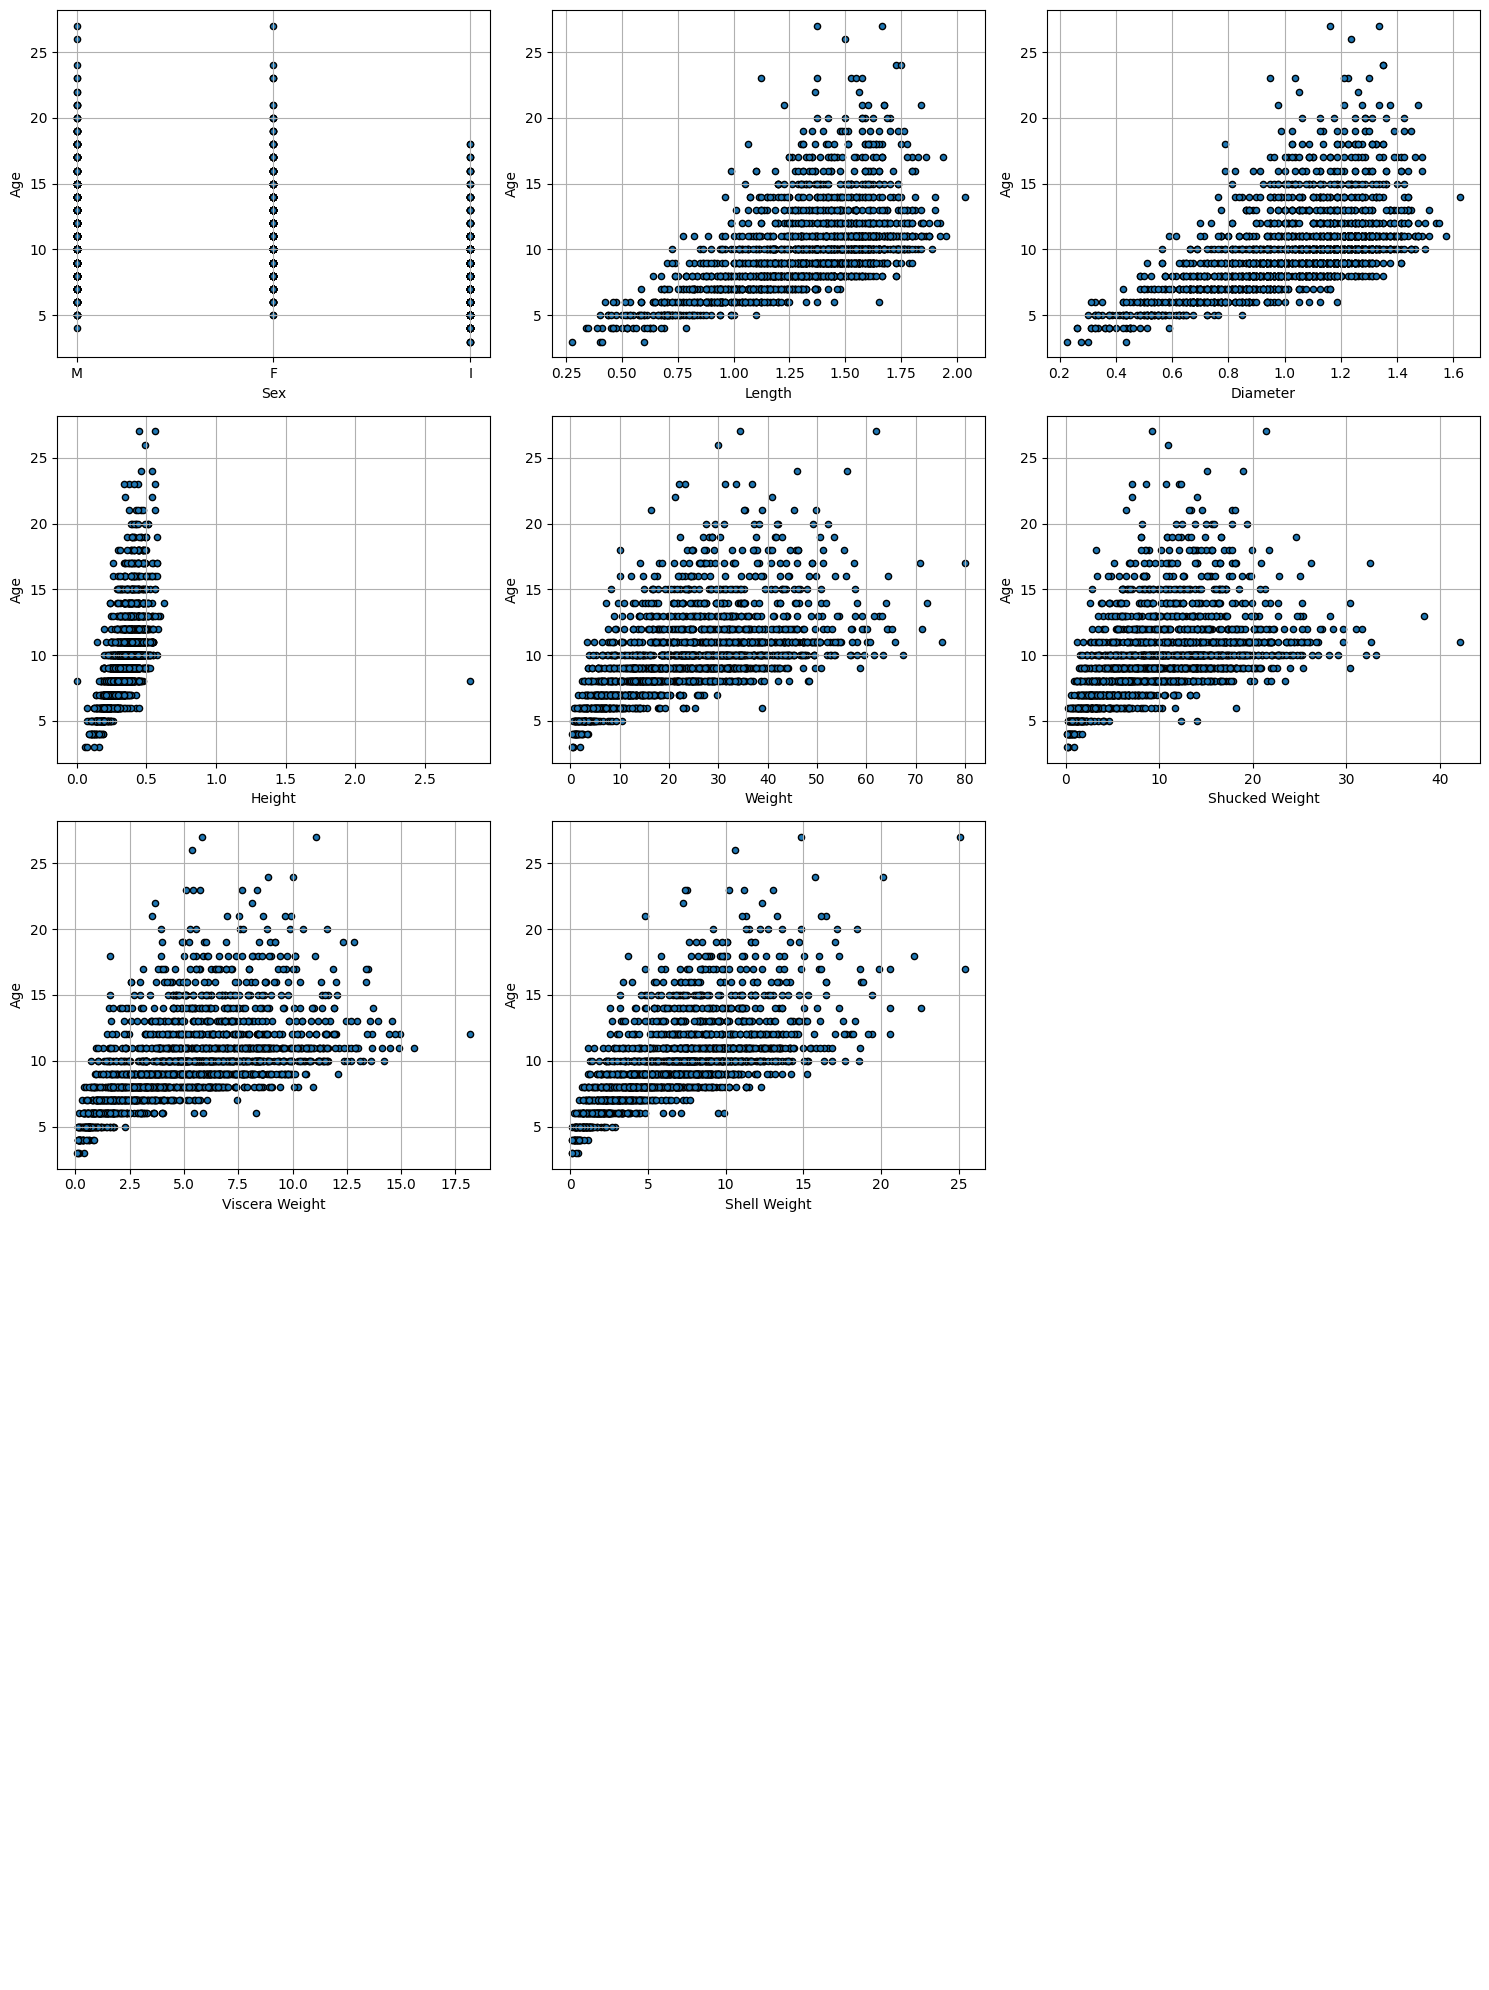

In [ ]:
feature_names = ["Sex", "Length", "Diameter", "Height", "Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]

# Graficar cada característica contra la etiqueta
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.axis('off')  # Desactivar ejes adicionales
        continue
    ax.scatter(df[feature_names[i]], df['Age'], edgecolor='k', s=20)
    ax.set_ylabel("Age")
    ax.set_xlabel(feature_names[i])
    ax.grid(True)

plt.tight_layout()
plt.show()

Podemos observar que las variables no exhiben un comportamiento lineal, lo que sugiere la presencia de relaciones no lineales entre ellas. Asimismo, notamos la existencia de valores atípicos, los cuales deben ser manejados con precaución y considerar la aplicación de técnicas de regularización para mitigar su influencia en el análisis.

También es notable que todas las variables relacionadas con el peso muestran un comportamiento similar, lo que indica una alta correlación entre ellas. Esto podría sugerir redundancia en los datos o la necesidad de realizar un análisis más detallado para comprender mejor la relación entre estas variables

<ipython-input-5-1108ebef6d8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


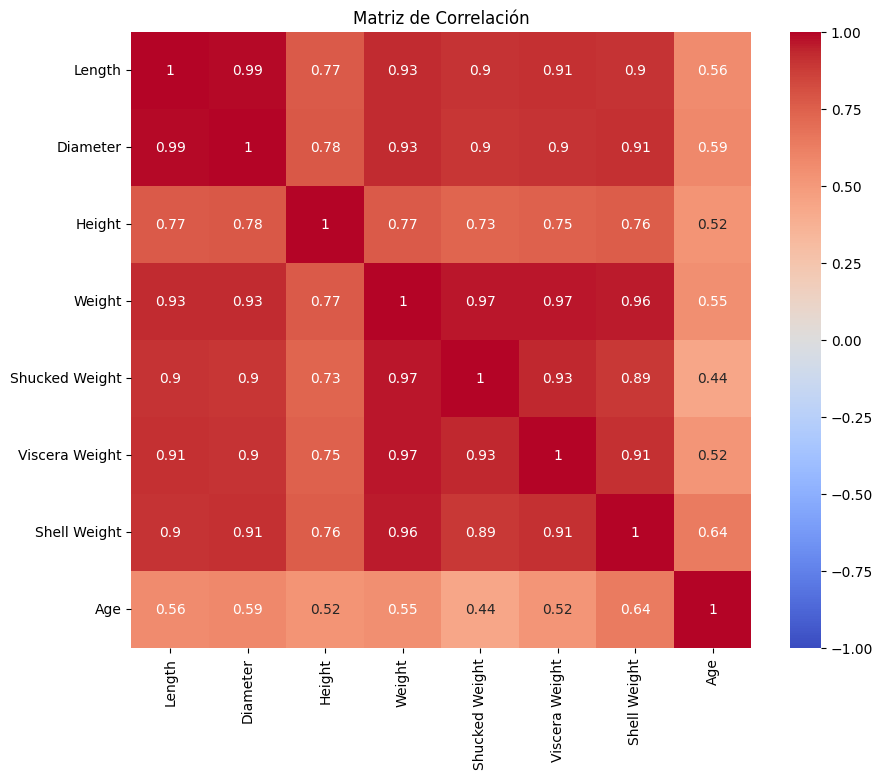

In [ ]:
correlation_matrix = df.corr()
# Crear una figura y un eje (subplot)
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título al mapa de calor
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

Hemos confirmado que existe una fuerte correlación entre las variables relacionadas con el peso. Aunque inicialmente no consideramos esto como un problema, debemos ser conscientes de que esta alta correlación podría generar un potencial sobreajuste del modelo y limitar su capacidad de predicción precisa. Por lo tanto, es esencial seguir monitoreando y evaluando cuidadosamente cómo estas variables influyen en el rendimiento del modelo a medida que avanzamos en nuestro análisis y desarrollo.

In [ ]:
X = df.iloc[:, df.columns != 'Age' ]
X = X.drop(X.columns[0], axis = 1)
y = df['Age']

In [ ]:
linear_metrics = []
linear_no_variable_metrics = []
poly2_metrics = []
poly2_no_variable_metrics = []

# 1B

Empezaremos a desarrollar nuestro modelos


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

linear_metrics.append((mse, r2, rmse, mae))
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 5.612993640964755
R-squared (R²): 0.48557348638671516
Root Mean Squared Error (RMSE): 2.3691757302835845
Mean Absolute Error (MAE): 1.6941007076241628


In [ ]:
polynomial_degrees = [2, 3, 4, 5]
# Iterar sobre diferentes grados de polinomios
for degree in polynomial_degrees:
    # Crear objeto de transformación polinómica
    polynomial_features = PolynomialFeatures(degree=degree)

    # Transformar las características a un espacio polinómico
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X_train_poly, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular métricas de desempeño
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    if degree == 2: poly2_metrics.append((mse, r2, rmse, mae))

    # Imprimir métricas para el grado de polinomio actual
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("===============================")

Polynomial Degree: 2
Mean Squared Error (MSE): 4.987381216385082
R-squared (R²): 0.5429103798584775
Root Mean Squared Error (RMSE): 2.233244549167216
Mean Absolute Error (MAE): 1.5817093598591982
Polynomial Degree: 3
Mean Squared Error (MSE): 8.35052128559854
R-squared (R²): 0.23468120105234325
Root Mean Squared Error (RMSE): 2.8897268531123386
Mean Absolute Error (MAE): 1.7359864789332207
Polynomial Degree: 4
Mean Squared Error (MSE): 342.3927937067074
R-squared (R²): -30.380033974629637
Root Mean Squared Error (RMSE): 18.503858886910788
Mean Absolute Error (MAE): 3.355442936733762
Polynomial Degree: 5
Mean Squared Error (MSE): 768800.2592205574
R-squared (R²): -70458.94745646004
Root Mean Squared Error (RMSE): 876.8125564911564
Mean Absolute Error (MAE): 70.23209984757212


Durante el proceso de exploración de los modelos, se ha observado que tanto el modelo lineal como el modelo polinómico de grado 2 ofrecen la mejor aproximación para este caso. Sin embargo, al considerar la métrica R^2, se ha evidenciado que estos modelos presentan una confiabilidad limitada. Basándonos en análisis previos de los datos, surge la hipótesis de que ciertas variables podrían ser redundantes, lo que posiblemente conduce a un sobreajuste en los resultados.

En vista de esta situación, hemos decidido repetir el experimento con algunas modificaciones. En primer lugar, eliminaremos la variable 'weight', ya que tras examinar la matriz de correlación, hemos identificado que esta variable muestra una correlación sumamente alta (casi 1) con los parámetros 'Shucked Weight', 'Viscera Weight' y 'Shell Weight'.

Este enfoque nos permitirá explorar si la eliminación de estas variables redundantes tiene un impacto positivo en la confiabilidad de los modelos y si contribuye a mitigar el problema de sobreajuste que hemos identificado.     

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.6250,1.3000,0.4375,35.876292,17.434942,7.866986,9.525432,9
1,F,1.4875,1.0750,0.5250,43.218813,18.512224,11.226402,11.623295,11
2,F,1.3875,1.1125,0.4375,32.502702,15.620575,6.917278,7.895336,8
3,I,0.9875,0.7500,0.3000,8.490675,3.586212,1.927766,2.537280,8
4,I,0.9375,0.7250,0.3500,8.504850,3.968930,1.771844,2.338834,8


In [ ]:
X = df.iloc[:, df.columns != 'Age' ]
X = X.drop(X.columns[[0, 4]], axis = 1)
y = df['Age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)

linear_no_variable_metrics.append((mse, r2, rmse, mae))

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 5.1715184926864115
R-squared (R²): 0.5024807005998639
Root Mean Squared Error (RMSE): 2.2740972918251345
Mean Absolute Error (MAE): 1.6521411887411006


In [ ]:
polynomial_degrees = [2, 3]
# Iterar sobre diferentes grados de polinomios
for degree in polynomial_degrees:
    # Crear objeto de transformación polinómica
    polynomial_features = PolynomialFeatures(degree=degree)

    # Transformar las características a un espacio polinómico
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X_train_poly, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular métricas de desempeño
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    if degree == 2: poly2_no_variable_metrics.append((mse, r2, rmse, mae))
    # Imprimir métricas para el grado de polinomio actual
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print("===============================")

Polynomial Degree: 2
Mean Squared Error (MSE): 4.773783873899495
R-squared (R²): 0.5407442491428869
Root Mean Squared Error (RMSE): 2.184899053480388
Mean Absolute Error (MAE): 1.5390636637891448
Polynomial Degree: 3
Mean Squared Error (MSE): 4.963872452634285
R-squared (R²): 0.5224570213876645
Root Mean Squared Error (RMSE): 2.227974966788066
Mean Absolute Error (MAE): 1.5922469503975132


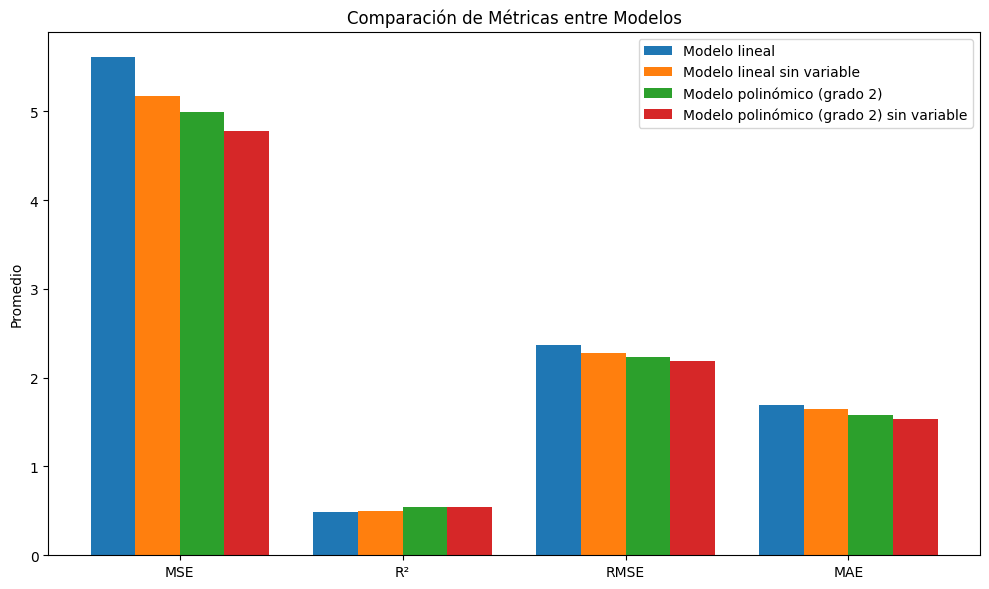

In [ ]:
# Convertir las listas en arrays para facilitar el procesamiento
linear_metrics = np.array(linear_metrics)
linear_no_variable_metrics = np.array(linear_no_variable_metrics)
poly2_metrics = np.array(poly2_metrics)
poly2_no_variable_metrics = np.array(poly2_no_variable_metrics)

# Etiquetas para las métricas
metric_labels = ['MSE', 'R²', 'RMSE', 'MAE']

# Crear un gráfico de barras comparativo
x = np.arange(len(metric_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width*1.5, linear_metrics.mean(axis=0), width, label='Modelo lineal')
rects2 = ax.bar(x - width/2, linear_no_variable_metrics.mean(axis=0), width, label='Modelo lineal sin variable')
rects3 = ax.bar(x + width/2, poly2_metrics.mean(axis=0), width, label='Modelo polinómico (grado 2)')
rects4 = ax.bar(x + width*1.5, poly2_no_variable_metrics.mean(axis=0), width, label='Modelo polinómico (grado 2) sin variable')

ax.set_ylabel('Promedio')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metric_labels)
ax.legend()

fig.tight_layout()

plt.show()

Como podemos observar, el modelo de grado dos muestra el menor error de acuerdo a nuestras métricas y un valor R² más alto. Al comparar los modelos con y sin la variable "weight", notamos una ligera mejora al eliminarla. Esto nos indica que hemos tomado una decisión acertada al considerar esa variable como redundante, ya que su exclusión ha contribuido a una mejor capacidad predictiva del modelo.

# Elección del modelo
Hemos decidido seleccionar un modelo polinomial de grado 2 como nuestro principal candidato a ser el mejor modelo. Sin embargo, antes de finalizar nuestra elección, vamos a realizar una última prueba en este modelo utilizando técnicas de regularización. Esta decisión se basa en la observación realizada durante el análisis exploratorio de los datos, donde hemos identificado algunos valores atípicos en las edades de algunos cangrejos que están considerablemente por encima de la media encontrada, con edades de 25, 27 y 28 años. Estos valores atípicos pueden estar introduciendo ruido en nuestro modelo, y es por eso que consideramos la opción de aplicar regularización para determinar si podemos continuar mejorando la precisión del modelo.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

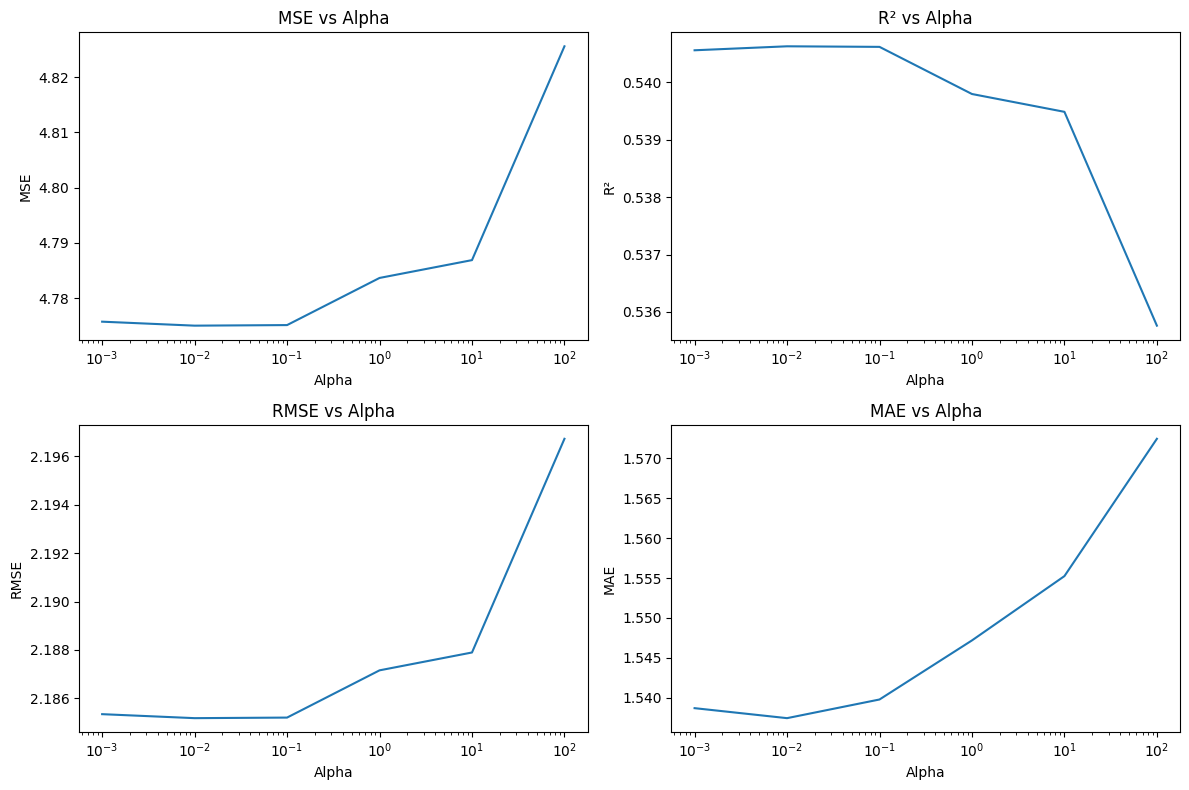

In [ ]:

# Transformar las características a un espacio polinómico
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)


# Definir una lista de valores de alpha para probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

mse_scores = []
r2_scores = []
rmse_scores = []
mae_scores = []
mejor_alpha = []
# Iterar a través de diferentes valores de alpha
for alpha in alphas:
    # Modelo Ridge
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    y_pred_ridge = ridge_model.predict(X_test_poly)

    # Calcular métricas
    mse_scores.append(mean_squared_error(y_test, y_pred_ridge))
    r2_scores.append(r2_score(y_test, y_pred_ridge))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    mae_scores.append(mean_absolute_error(y_test, y_pred_ridge))
    mejor_alpha.append((alpha, r2_score(y_test, y_pred_ridge)))
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha')

plt.subplot(2, 2, 2)
plt.plot(alphas, r2_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('R² vs Alpha')

plt.subplot(2, 2, 3)
plt.plot(alphas, rmse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')

plt.subplot(2, 2, 4)
plt.plot(alphas, mae_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE vs Alpha')

plt.tight_layout()
plt.show()

In [ ]:
best_score = max(mejor_alpha, key=lambda x: x[1])
print("Best R² Score:", best_score[1])
print("Best alpha:", best_score[0])

Best R² Score: 0.5406248602520681
Best alpha: 0.01


Observamos que en este caso, la regularización no tuvo un impacto positivo en la precisión del modelo, por lo tanto, hemos decidido mantener nuestro mejor modelo como el polinomio de grado 2. Después de evaluar diferentes valores de "alpha" para la regresión Ridge, hemos concluido que la complejidad adicional introducida por la regularización no resultó en una mejora significativa en la capacidad predictiva del modelo. Por lo tanto, optamos por conservar la simplicidad del modelo polinómico de grado 2 como nuestra elección final.

Vamos a entrenar nuestro mejor modelo con todo el conjunto de datos y ver si mejoran las metricas.

# 1C

In [ ]:
# Crear objeto de transformación polinómica
polynomial_features = PolynomialFeatures(degree=2)

# Transformar las características a un espacio polinómico
X_poly = polynomial_features.fit_transform(X)  # Transforma todos los datos

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_poly, y.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_poly)

# Calcular métricas en el conjunto completo de datos
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Imprimir las métricas
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
model.coef_


Mean Squared Error: 4.560154391532105
R-squared: 0.5620870265832006
Root Mean Squared Error: 2.135451800329875
Mean Absolute Error: 1.5125180063585626


array([-1.52826821e-13,  6.82209186e+00, -2.12659644e+00,  8.90912475e+00,
       -7.18288855e-01,  7.26357498e-01,  1.12605097e+00, -1.07583346e+01,
        2.66877341e+01, -4.26693825e+01,  8.12352776e-01, -1.16070951e+00,
        3.28506495e-01, -2.16338454e+01,  5.92810171e+01, -3.93424487e-01,
        6.96641200e-01, -6.07067560e-01, -1.46073899e+00, -1.32955629e+00,
        7.30291452e-01,  5.25916810e-01,  3.02698042e-02, -3.51606995e-02,
       -5.56772275e-02,  3.23269520e-02,  1.01676500e-02,  2.02417025e-02])

como se puede observar este será el modelo con el que se probará el nuevo conjunto de datos, ya que es el que presenta un menor MSE y MAE

Por último validaremos para nosotros con nuestros datos ocultos

Podemos validar que tenemos un modelo que describe le 56 % de los datos